In [65]:
import pandas as pd
import seaborn as sns
from reviews import Reviews

REVIEWS_FILENAME = "./fantano-fetch/bin/reviews.csv"

In [66]:
reviews = Reviews(filename=REVIEWS_FILENAME)
reviews.get_all_genres()

{'transcendental auditory experience',
 'trap',
 'interstellar collaboration',
 'creepy spoken word passages',
 'funeral doom metal',
 'noise metal harshness from hell',
 'sorta conscious but also drugged out',
 'psychedelic folk',
 'midwest emo',
 'funk rock',
 'breakcore',
 'krautrock',
 'pop soul',
 'memetic mashups',
 'french house',
 'church organ drones',
 'post-hip hop',
 'alt-country',
 'jazz rap instrumentals made from grimy live recordings and chopped up nicely',
 'post-post-hardcore',
 'luxurious jazz rap',
 'nu jazz',
 'lo-fi auto-tune ballads',
 'industrial rock',
 'punk rap',
 'psychedelic warped noise magic',
 'post-rave',
 'international bangers for truth and dance',
 'glam',
 'no no no no no',
 '80s hard rock guitar heroism viewed through a lo-fi lens',
 'country soul',
 'neo-soul',
 'future pop',
 'atmospheric sludge metal',
 'new orleans r&b',
 'indie pop',
 'groove metal',
 'tribal ambient',
 'contemporary folk',
 'tread punk',
 'contemporary classical',
 'neo-new w

In [67]:
reviews.get_by_genre_substr("pop").mean_rating()

(5.924146649810367, 791)

In [68]:
POPULAR_GENRES = [
    "pop", 
    "hip hop",
    "electronic", 
    "rock",
    "r&b",
    "country", 
    "metal",
    "singer-songwriter",
    "folk",
    "indie",
    "ambient",
    "soul",
    "funk",
    "house",
    "punk",
    "industrial",
    "psychedelic"
]

<AxesSubplot:xlabel='rating', ylabel='genre'>

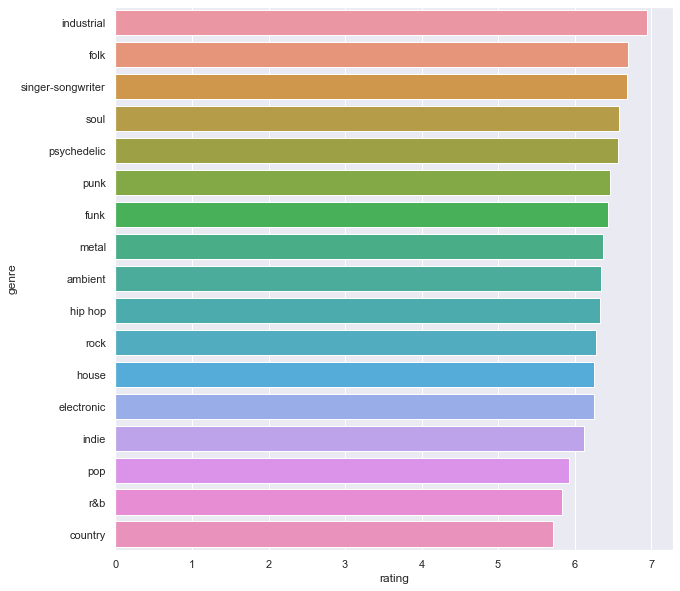

In [69]:
data = [(genre, reviews.get_by_genre_substr(genre).mean_rating()) for genre in POPULAR_GENRES]
data = [(genre, rating, num_reviews) for (genre, (rating, num_reviews)) in data]

df = pd.DataFrame(data, columns=["genre", "rating", "num_reviews"]).sort_values("rating", ascending=False)

sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(x="rating", y="genre", data=df, estimator=sum)